# Data Exploration

Possible Questions:  
**Can we predict people's political orientation based on how they portray their character traits and habits?**

Data:
- Cognitive Ability test questions
- Question_data
- Parsed_data

Exploration:
- Keywords
- Political Questions
- Descriptive Questions
- Question Extraction

Source: https://figshare.com/articles/dataset/OKCupid_Datasets/14987388?file=28850916



In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style='darkgrid')

In [2]:
root_path = 'data/'

### Cognitive ability test questions

In [3]:
# cognitive ability test questions
test_items = pd.read_csv(os.path.join(root_path, 'test_items.csv'))
print(test_items.columns)
print(test_items.shape)

display(test_items.head())

Index(['Unnamed: 0', 'ID', 'text', 'option_1', 'option_2', 'option_3',
       'option_4', 'option_correct'],
      dtype='object')
(28, 8)


,Unnamed: 0,ID,text,option_1,option_2,option_3,option_4,option_correct
0,q178,178,Which is bigger?,The earth,The sun,NaN,NaN,2
1,q255,255,STALE is to STEAL as 89475 is to...,89457,98547,89754,89547,4
2,q1201,1201,"What is next in this series? 1, 4, 10, 19, 31, _",36,48,46,Don't know / don't care,3
3,q14835,14835,"If you turn a left-handed glove inside out, it...",On my left hand,On my right hand,NaN,NaN,2
4,q8672,8672,In the line 'Wherefore art thou Romeo?' what d...,Why,Where,How,Who cares / wtf?,1


### Question Data

In [4]:
question_data = pd.read_csv(os.path.join(root_path, 'question_data.csv'), sep=';')
question_data = question_data.set_index('Unnamed: 0')  # set first column (question number) as index
print('shape', question_data.shape)
print(question_data.columns)
display(question_data.head())

shape (2620, 9)
Index(['text', 'option_1', 'option_2', 'option_3', 'option_4', 'N', 'Type',
       'Order', 'Keywords'],
      dtype='object')


,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords
Unnamed: 0,,,,,,,,,
q2,Breast implants?,more cool than pathetic,more pathetic than cool,NaN,NaN,24839,N,NaN,sex/intimacy; preference; opinion
q11,How does the idea of being slapped hard in the...,Horrified,Aroused,Nostalgic,Indifferent,28860,N,NaN,sex/intimacy
q12,Divide your age by 2. Have you had sex with a...,Yes,No,NaN,NaN,22496,O,NaN,sex/intimacy
q13,Is a girl who's slept with 100 guys a bad person?,Yes,No,NaN,NaN,32581,O,NaN,sex/intimacy
q14,Is a guy who's slept with 100 girls a bad person?,Yes,No,NaN,NaN,31127,O,NaN,sex/intimacy


### Data

In [5]:
data = pd.read_parquet(os.path.join(root_path, 'parsed_data_public.parquet'))
print('shape', data.shape)
display(data.head())

shape (68371, 2626)


,Unnamed: 0,q2,q11,q12,q13,q14,q16,q17,q18,q20,...,q86615,q86699,q363047,CA,gender_orientation,gender,race,gender2,gender2_num,CA_items
0,1,None,Horrified,None,None,None,None,No,None,None,...,None,None,None,0.763080,Hetero_female,Woman,White,Woman,0.0,4
1,2,None,None,None,None,None,None,None,None,None,...,None,None,None,NaN,Hetero_male,Man,None,Man,1.0,0
2,3,None,None,None,No,No,None,No,None,None,...,None,None,None,0.661309,Hetero_female,Woman,None,Woman,0.0,7
3,4,None,None,None,None,None,None,None,None,None,...,None,None,None,NaN,Hetero_female,Woman,White,Woman,0.0,0
4,5,None,None,None,None,None,None,None,None,None,...,None,None,None,0.875424,Bisexual_female,Woman,None,Woman,0.0,3


## Exploration

List of keywords

In [6]:
keys = question_data.Keywords.dropna().unique().tolist()  # set of unique keywords
print('number of unique keywords', len(keys))
print(keys)


number of unique keywords 61
['sex/intimacy; preference; opinion', 'sex/intimacy', 'sex/intimacy; BDSM', 'religion/superstition', 'preference', 'descriptive', 'opinion', 'religion/superstition; descriptive', 'politics', 'preference; opinion', 'sex/intimacy; opinion', 'religion/superstition; opinion', 'sex/intimacy; preference; descriptive', 'preference; descriptive', 'sex/intimacy; preference', 'sex/intimacy; descriptive', 'politics; preference', 'politics; opinion', 'cognitive', 'descriptive; cognitive', 'politics; religion/superstition', 'opinion; technology', 'opinion; descriptive', 'politics; preference; opinion; sex/intimacy', 'descriptive; preference', 'politics; preference; descriptive', 'politics; religion/superstition; opinion', 'politics; opinion; sex/intimacy', 'descriptive; technology', 'sex/intimacy; religion/superstition', 'politics; sex/intimacy; religion/superstition ', 'religion/superstition; preference', 'opinion; cognitive', 'politics; preference; opinion', 'preferen

In [7]:
[key for key in list(keys)[1:] if ";" not in key]

['sex/intimacy',
 'religion/superstition',
 'preference',
 'descriptive',
 'opinion',
 'politics',
 'cognitive']

### Number of answers per question

In [8]:
# per question count number of times the question is answered
n_answers_per_question = data.notnull().sum(axis=0)[1:] # first column is question name (Unnamed: 0) => [1:]

# append column with number of people who answered the question to question dataframe
question_data = question_data.join(n_answers_per_question.to_frame('n_answers')) 

### Political Questions

In [95]:
# find political questions
political_questions = question_data[question_data.Keywords.str.contains('politics', na=False)]
print(f'number of questions involving politcs: {political_questions.shape[0]}')

# sort political questions
sorted_p_questions = political_questions.sort_values(by=['n_answers'], ascending=False)
print(sorted_p_questions['text'].values)
display(sorted_p_questions.head())
political_belief = 'q212813'

number of questions involving politcs: 270
['How do you feel about government-subsidized food programs (free lunch, food stamps, etc.)?'
 'Are you either vegetarian or vegan?' 'Do you enjoy discussing politics?'
 "Should burning your country's flag be illegal?"
 'Which best describes your political beliefs?'
 'Should evolution and creationism be taught side-by-side in school?'
 'For you personally, is abortion an option in case of an accidental pregnancy?'
 'Do you believe your country would be more or less safe if every adult owned a gun?'
 'In a relationship I like to discuss politics with my partner.'
 'Which is worse: starving children or abused animals?'
 'The idea of gay and lesbian couples having children is:'
 'When men show extra courtesy toward women (opening doors, pulling out chairs, etc.), this is:'
 'Can anything be made the subject of a joke?'
 'Which is more offensive: book burning or flag burning?'
 'Are you okay with people who grow marijuana for their own personal us

,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords,n_answers
Unnamed: 0,,,,,,,,,,
q34113,How do you feel about government-subsidized fo...,No problem,"It's okay, if it is not abused",Okay for short amounts of time,Never - Get a job,31769,O,NaN,politics,68371.0
q179268,Are you either vegetarian or vegan?,Yes,No,NaN,NaN,54202,O,NaN,politics; descriptive,54202.0
q403,Do you enjoy discussing politics?,Yes,No,NaN,NaN,52369,O,NaN,politics; preference; descriptive,52369.0
q175,Should burning your country's flag be illegal?,Yes,No,NaN,NaN,45720,O,NaN,politics,45720.0
q212813,Which best describes your political beliefs?,Liberal / Left-wing,Centrist,Conservative / Right-wing,Other,45107,M,[4],politics; descriptive,45107.0


### Descriptive questions

In [10]:
# find descriptive questions
descriptive_questions = question_data[question_data.Keywords == 'descriptive']
print(f'number of questions with keyword descriptive: {descriptive_questions.shape[0]}')

# sort descriptive questions
sorted_d_questions = descriptive_questions.sort_values(by=['n_answers'], ascending=False)
# extract 10 most answered descriptive questions and target question about politcal orientation ('q212813')
questions_all = descriptive_questions.index.to_list()
questions_top_50 = sorted_d_questions[:50].index.to_list() 
print(sorted_d_questions['text'][:50].values)
display(sorted_d_questions[:50])

number of questions with keyword descriptive: 829
['Do you like watching foreign movies with subtitles?'
 'Which type of wine would you prefer to drink outside of a meal, such as for leisure?'
 'Have you smoked a cigarette in the last 6 months?'
 'Do you enjoy intense intellectual conversations?'
 'Rate your self-confidence:' 'Are you happy with your life?'
 'How frequently do you drink alcohol?'
 "What's your deal with harder drugs (stuff beyond pot)?"
 'Which word describes you better?'
 "What's your relationship with marijuana?"
 'How often do you keep your promises?'
 'How often are you open with your feelings?'
 'How often do you brush your teeth?'
 'If you had to name your greatest motivation in life thus far, what would it be?'
 'Do you often make jokes that offend more uptight people?'
 'How much influence or control do your parents have over your life?'
 'How important are your political beliefs to you?'
 'Do you space out or daydream a lot?'
 'Do you keep a budget (of your fi

,text,option_1,option_2,option_3,option_4,N,Type,Order,Keywords,n_answers
Unnamed: 0,,,,,,,,,,
q416235,Do you like watching foreign movies with subti...,Yes,No,Can't answer without a subtitle,NaN,20364,O,"3, 1, 2",descriptive,68371.0
q85419,Which type of wine would you prefer to drink o...,"White (such as Chardonnay, Riesling).","Red (such as Merlot, Cabernet, Shiraz).",Rosé (such as White Zinfindel).,I don't drink wine.,18838,N,NaN,descriptive,68371.0
q501,Have you smoked a cigarette in the last 6 months?,Yes,No,NaN,NaN,57123,O,NaN,descriptive,57123.0
q358084,Do you enjoy intense intellectual conversations?,Yes,No,NaN,NaN,54696,O,NaN,descriptive,54696.0
q20930,Rate your self-confidence:,"Very, very high",Higher than average,Average,Below average,53737,O,NaN,descriptive,53737.0
q4018,Are you happy with your life?,Yes,No,NaN,NaN,53625,O,NaN,descriptive,53625.0
q77,How frequently do you drink alcohol?,Very often,Sometimes,Rarely,Never,52467,O,NaN,descriptive,52467.0
q80,What's your deal with harder drugs (stuff beyo...,I do drugs regularly.,I do drugs occasionally.,"I've done drugs in the past, but no longer.",I never do drugs.,50107,O,NaN,descriptive,50107.0
q49,Which word describes you better?,Carefree,Intense,NaN,NaN,49827,N,NaN,descriptive,49827.0


### Extract answered descriptive Questions and political orientation 

In [11]:
# create dataframe of descriptive questions and political belief
descriptive_df = data[questions_all + [political_belief]]
descriptive_df = descriptive_df[descriptive_df[political_belief].notna()]
print(f'Number of people who answered some of the descriptive questions and their political belief: {descriptive_df.shape}')

Number of people who answered some of the descriptive questions and their political belief: (45107, 830)


### Split into Train and Test Set

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(data, shuffle=True, test_size=0.2, random_state=42)
df_train.to_parquet(os.path.join(root_path, 'train.parquet'))
df_test.to_parquet(os.path.join(root_path, 'test.parquet'))

In [14]:
df_train, df_test = train_test_split(descriptive_df, shuffle=True, test_size=0.2, random_state=42)
#df_train.to_parquet(os.path.join(root_path, 'train_descriptive.parquet'))
#df_test.to_parquet(os.path.join(root_path, 'test_descriptive.parquet'))

## Model 1: Inlcude the 10 most answered desctiptive questions as predictors:

In [15]:
df_train = pd.read_parquet(os.path.join(root_path, 'train.parquet'))
df_test = pd.read_parquet(os.path.join(root_path, 'test.parquet'))

In [16]:
df_train_top_50 = df_train[questions_top_50 + [political_belief]].dropna() # remove rows with NaN Values 
df_test_top_50= df_test[questions_top_50 + [political_belief]].dropna() # remove rows with NaN Values 
# TODO: think about political view 'other' What do we want to do with that?

print('shape train set:', df_train_top_50.shape)
display(df_train_top_50[:10])

shape train set: (9777, 51)


,q416235,q85419,q501,q358084,q20930,q4018,q77,q80,q49,q79,...,q26557,q23696,q27477,q30416,q26841,q83646,q81,q39373,q8865,q212813
index,,,,,,,,,,,,,,,,,,,,,
21628,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,Yes,Higher than average,Yes,Rarely,I never do drugs.,Carefree,Never.,...,Doesn't faze you one bit,Never,Yes,The profanity,About average,Yes.,Sometimes,Sometimes.,"Yes, I have a fulltime job",Other
51271,Can't answer without a subtitle,"Red (such as Merlot, Cabernet, Shiraz).",Yes,Yes,Higher than average,Yes,Sometimes,I never do drugs.,Carefree,I smoke occasionally.,...,Makes you feel uncomfortable,Sometimes,Yes,Neither one bothers me,Way more than average,Yes.,Rarely,Sometimes.,"Yes, I have a fulltime job",Other
57902,No,I don't drink wine.,Yes,Yes,Higher than average,Yes,Never,"I've done drugs in the past, but no longer.",Intense,"I smoked in the past, but no longer.",...,Doesn't faze you one bit,Never,No,The grammar,About average,Yes.,Never,Rarely.,"Yes, I have a fulltime job",Conservative / Right-wing
31176,Can't answer without a subtitle,I don't drink wine.,Yes,Yes,Higher than average,Yes,Rarely,"I've done drugs in the past, but no longer.",Carefree,"I smoked in the past, but no longer.",...,Doesn't faze you one bit,"Used to, but not any more",No,The grammar,Way more than average,Yes.,Never,Never.,No,Liberal / Left-wing
26531,Yes,"White (such as Chardonnay, Riesling).",No,Yes,Average,Yes,Sometimes,I never do drugs.,Carefree,Never.,...,Doesn't faze you one bit,"Used to, but not any more",No,The grammar,Way more than average,Yes.,Rarely,Rarely.,"Yes, I have a fulltime job",Liberal / Left-wing
20044,Can't answer without a subtitle,Rosé (such as White Zinfindel).,No,Yes,Average,Yes,Sometimes,"I've done drugs in the past, but no longer.",Intense,I smoke occasionally.,...,Doesn't faze you one bit,Sometimes,Yes,The grammar,Way more than average,No.,Rarely,Rarely.,"Yes, I have a fulltime job",Liberal / Left-wing
24454,Can't answer without a subtitle,Rosé (such as White Zinfindel).,No,Yes,Higher than average,No,Rarely,I never do drugs.,Carefree,Never.,...,Makes you feel uncomfortable,"Used to, but not any more",Yes,The grammar,About average,Yes.,Never,Sometimes.,Part time,Centrist
24735,Yes,"Red (such as Merlot, Cabernet, Shiraz).",No,Yes,Average,No,Sometimes,I never do drugs.,Intense,Never.,...,Doesn't faze you one bit,Never,Yes,The grammar,Way more than average,Yes.,Sometimes,Never.,No,Conservative / Right-wing
25863,Can't answer without a subtitle,I don't drink wine.,No,Yes,Average,Yes,Sometimes,I never do drugs.,Intense,"I smoked in the past, but no longer.",...,Doesn't faze you one bit,Sometimes,Yes,They both bother me equally,About average,Yes.,Lots,Sometimes.,"Yes, I have a fulltime job",Other


#### Convert top 10 answers to ordered categorical variabales:

In [17]:
from pandas.api.types import CategoricalDtype

In [18]:
questions_top_10 = questions_top_50[:10]
df_train_top_10 = df_train_top_50[questions_top_10+[political_belief]]
df_test_top_10 = df_test_top_50[questions_top_10+[political_belief]]
question_data.loc[questions_top_10].text

Unnamed: 0
q416235    Do you like watching foreign movies with subti...
q85419     Which type of wine would you prefer to drink o...
q501       Have you smoked a cigarette in the last 6 months?
q358084     Do you enjoy intense intellectual conversations?
q20930                            Rate your self-confidence:
q4018                          Are you happy with your life?
q77                     How frequently do you drink alcohol?
q80        What's your deal with harder drugs (stuff beyo...
q49                         Which word describes you better?
q79                 What's your relationship with marijuana?
Name: text, dtype: object

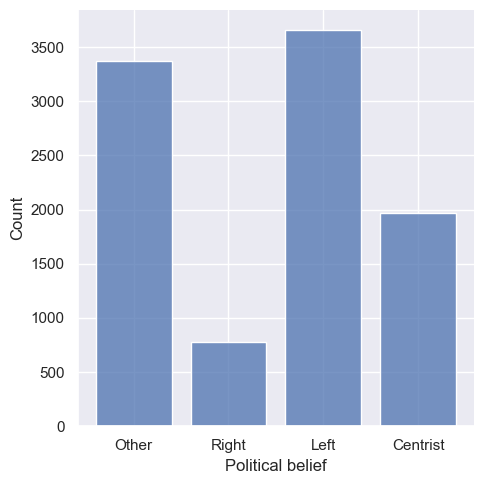

In [19]:
# Create a Displot
ax = sns.displot(df_train_top_10[political_belief], kind='hist', shrink=0.8)

# Set the bin names
ax.set_xticklabels(['Other', 'Right', 'Left', 'Centrist'])
ax.set_xlabels('Political belief')

# Show the plot
plt.show()

In [57]:
weights=(df_train_top_10.groupby(political_belief)[political_belief].count()/len(df_train_top_10)).to_list()
weights

[0.2012887388769561,
 0.07977907333537895,
 0.3743479594967781,
 0.34458422829088675]

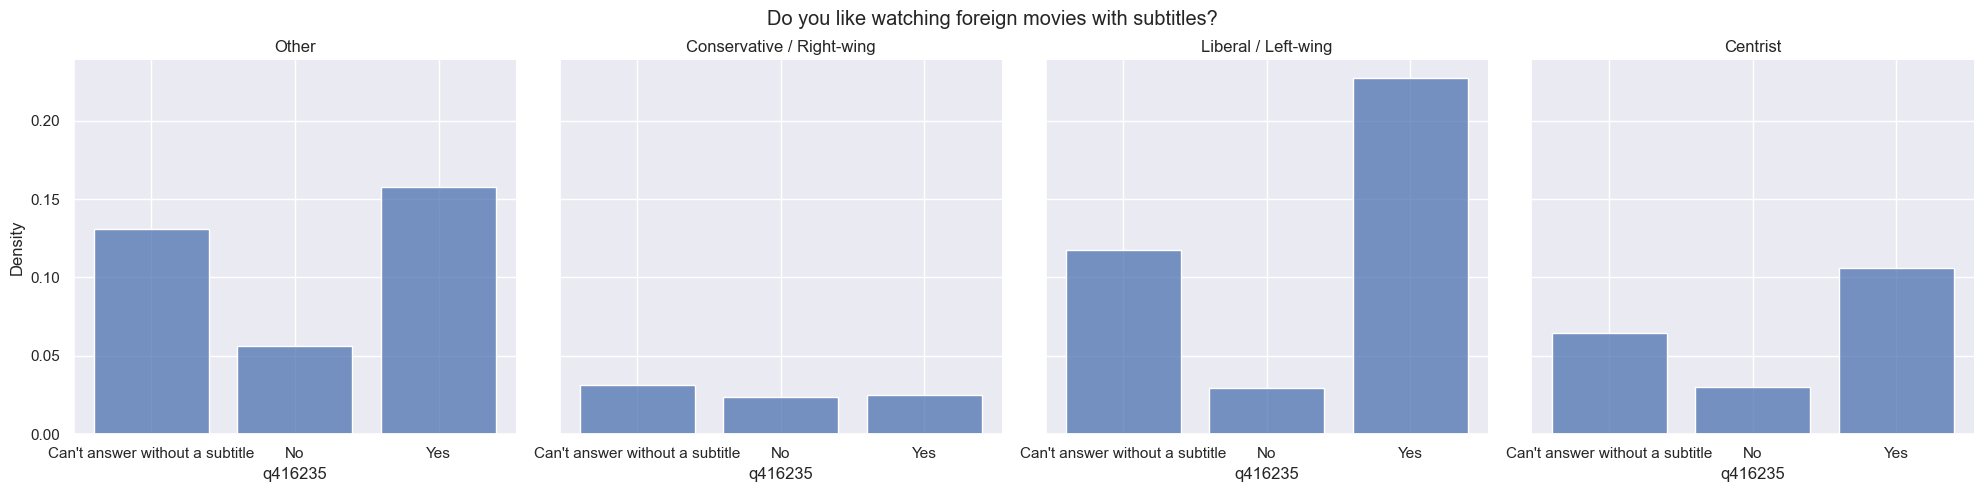

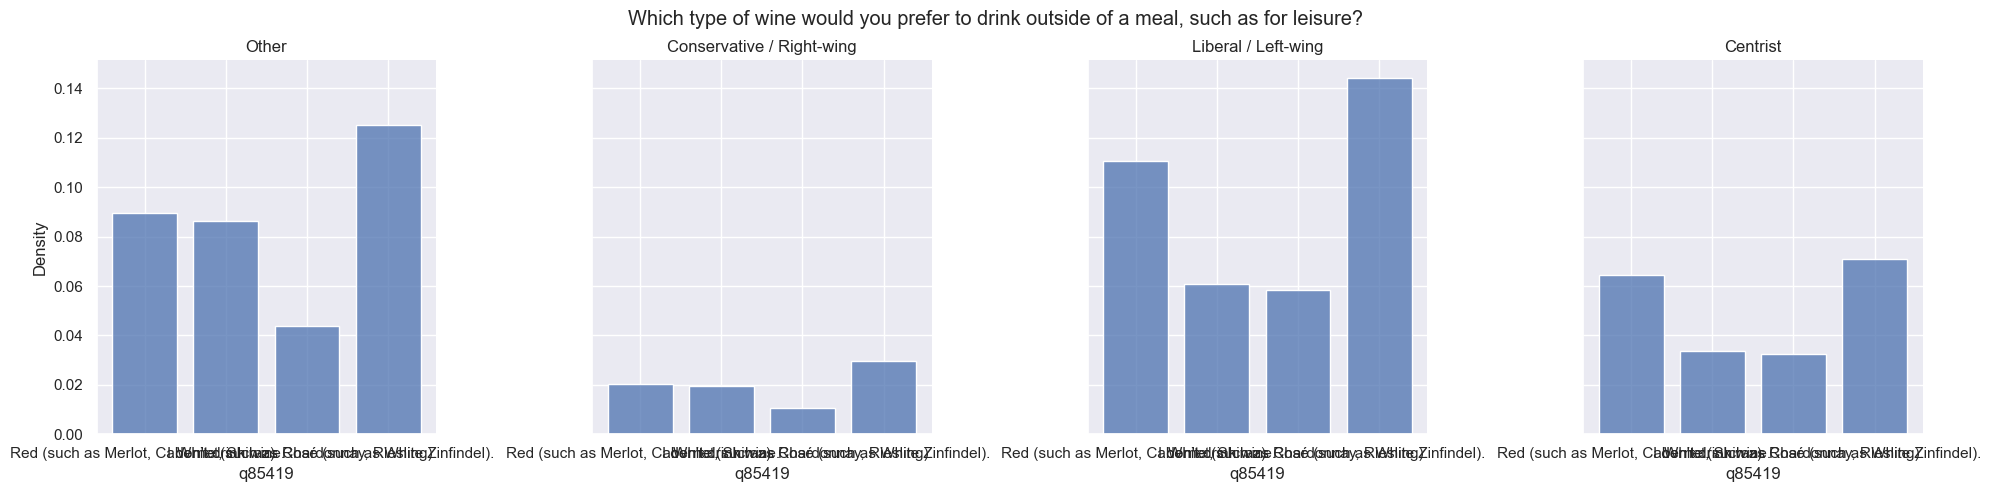

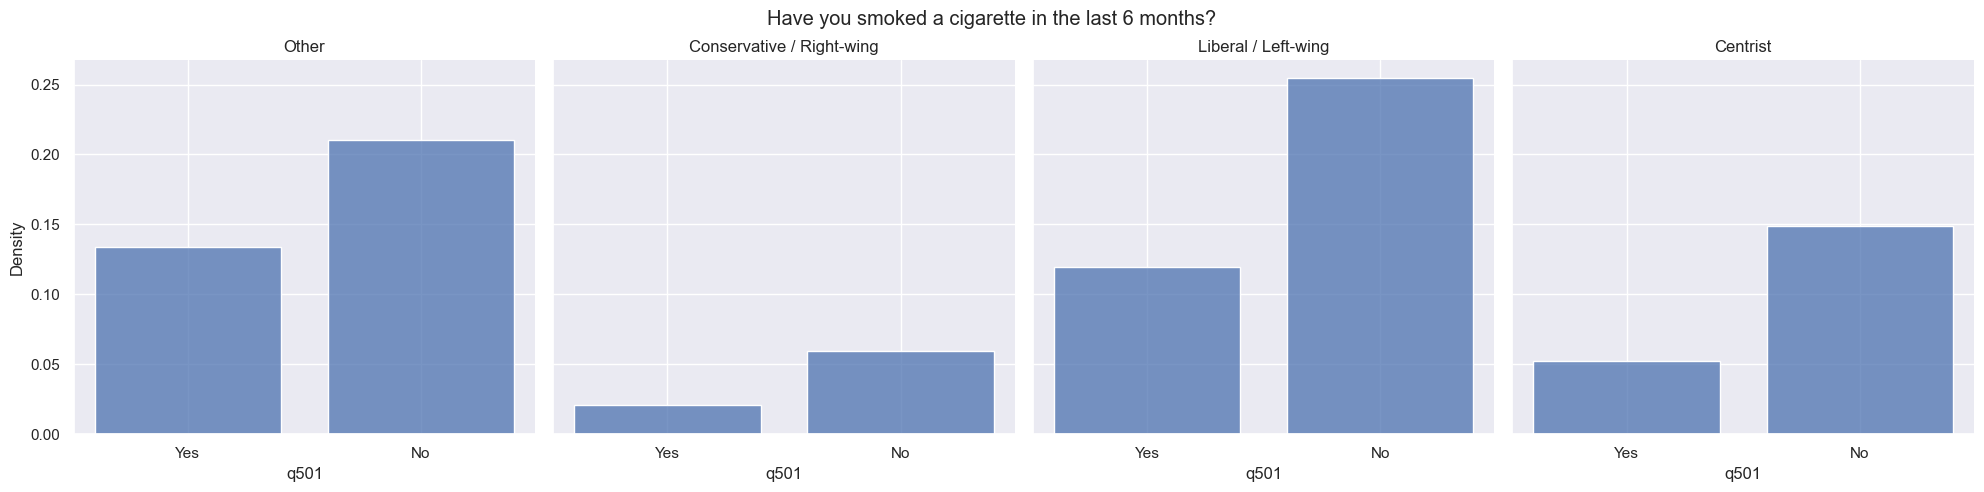

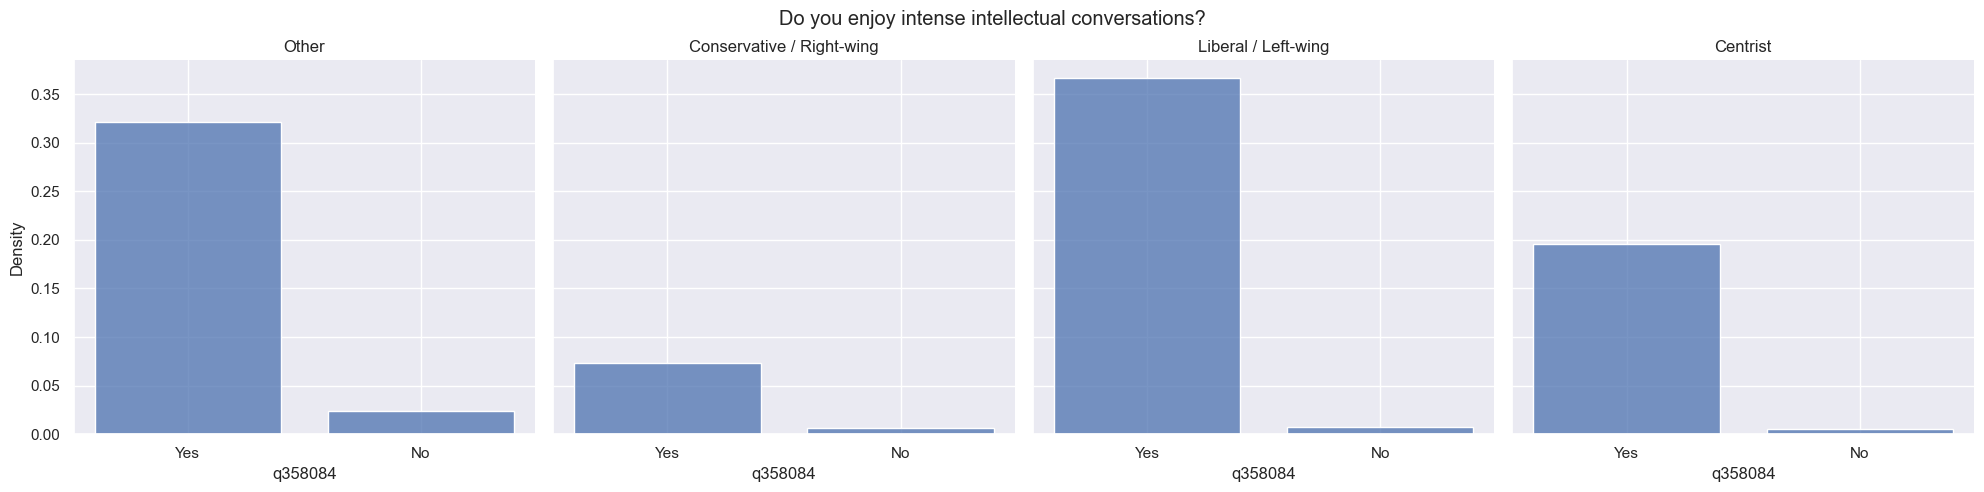

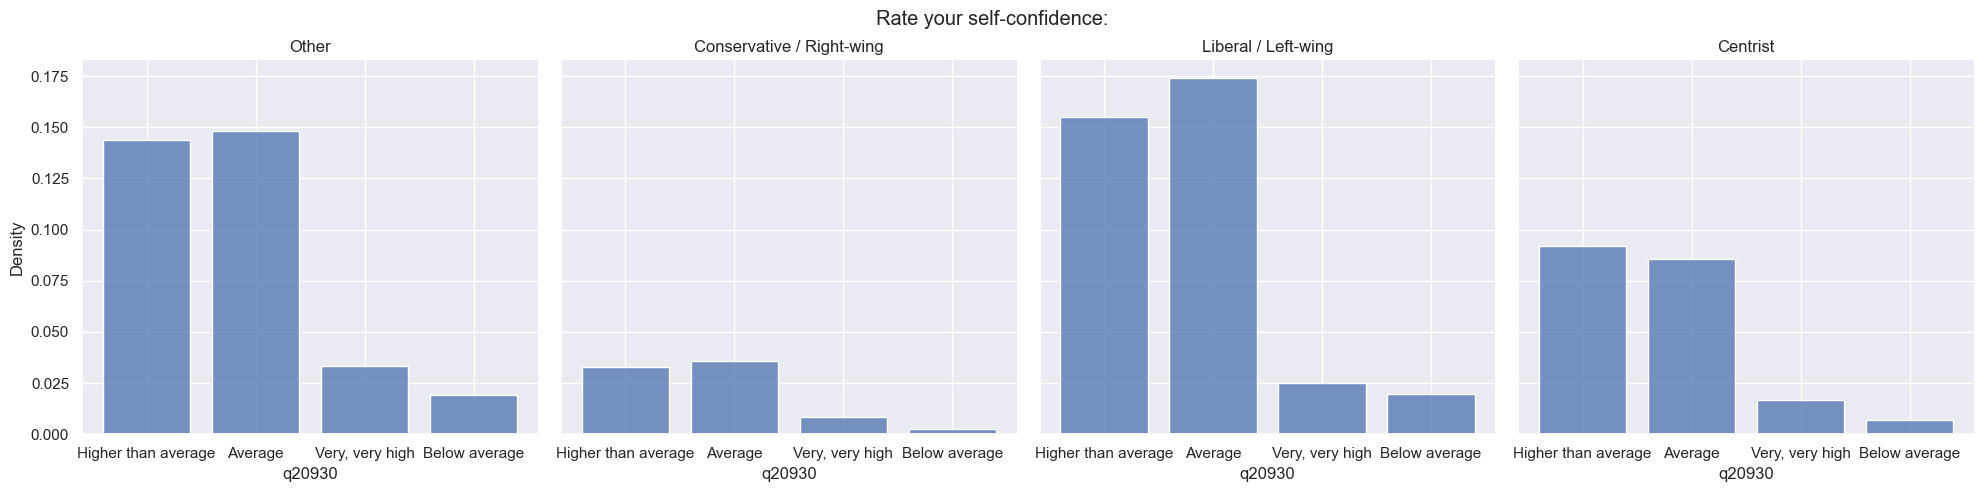

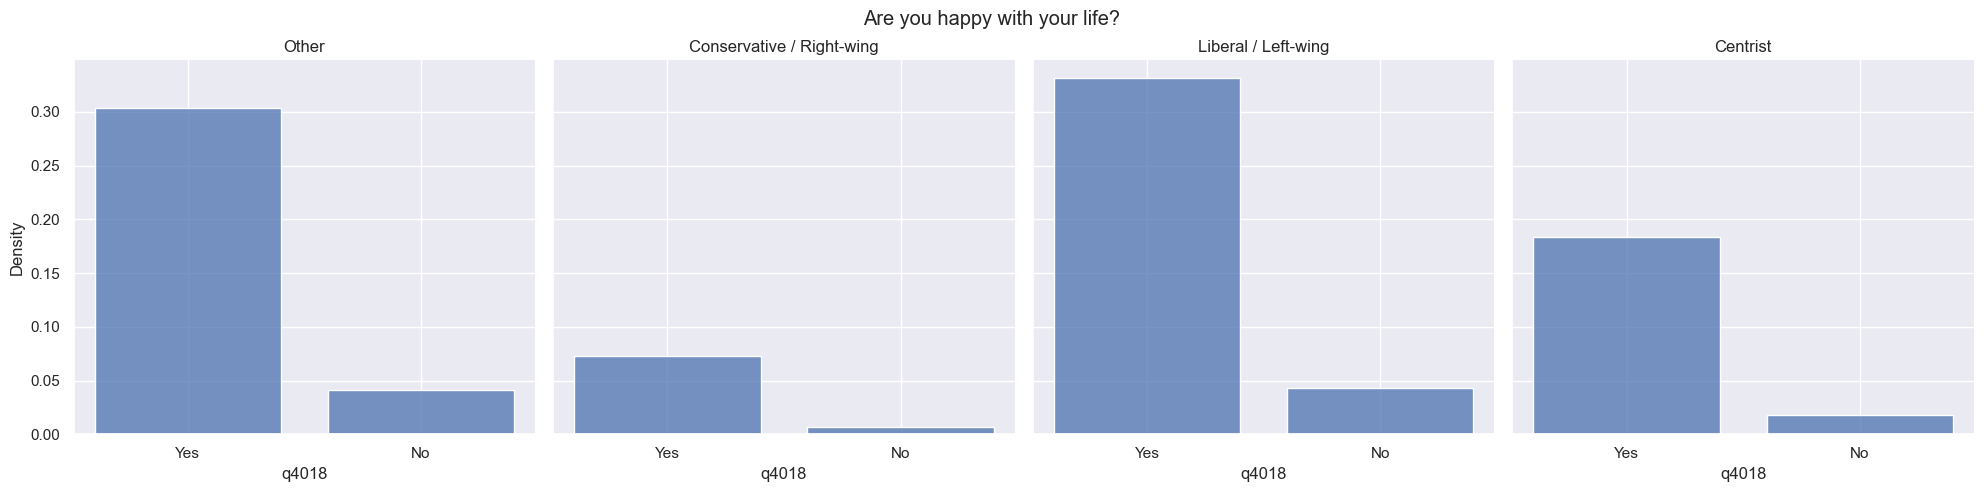

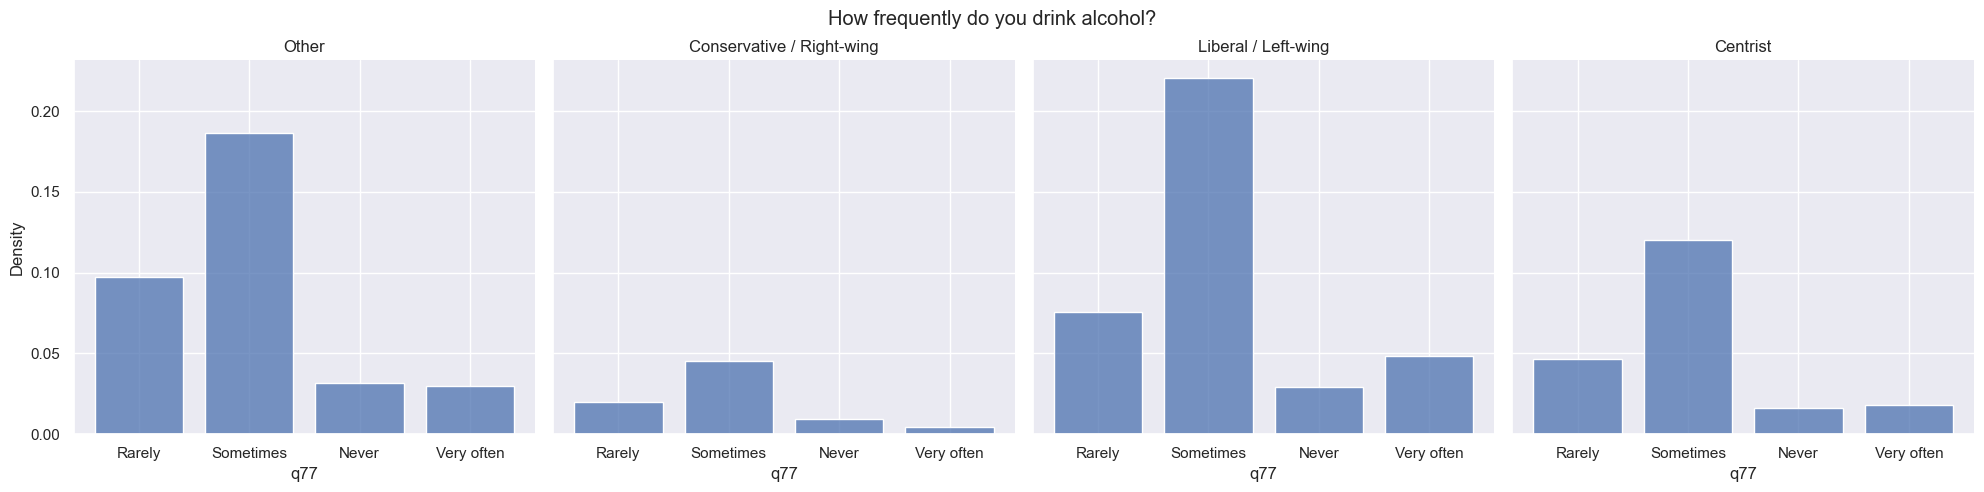

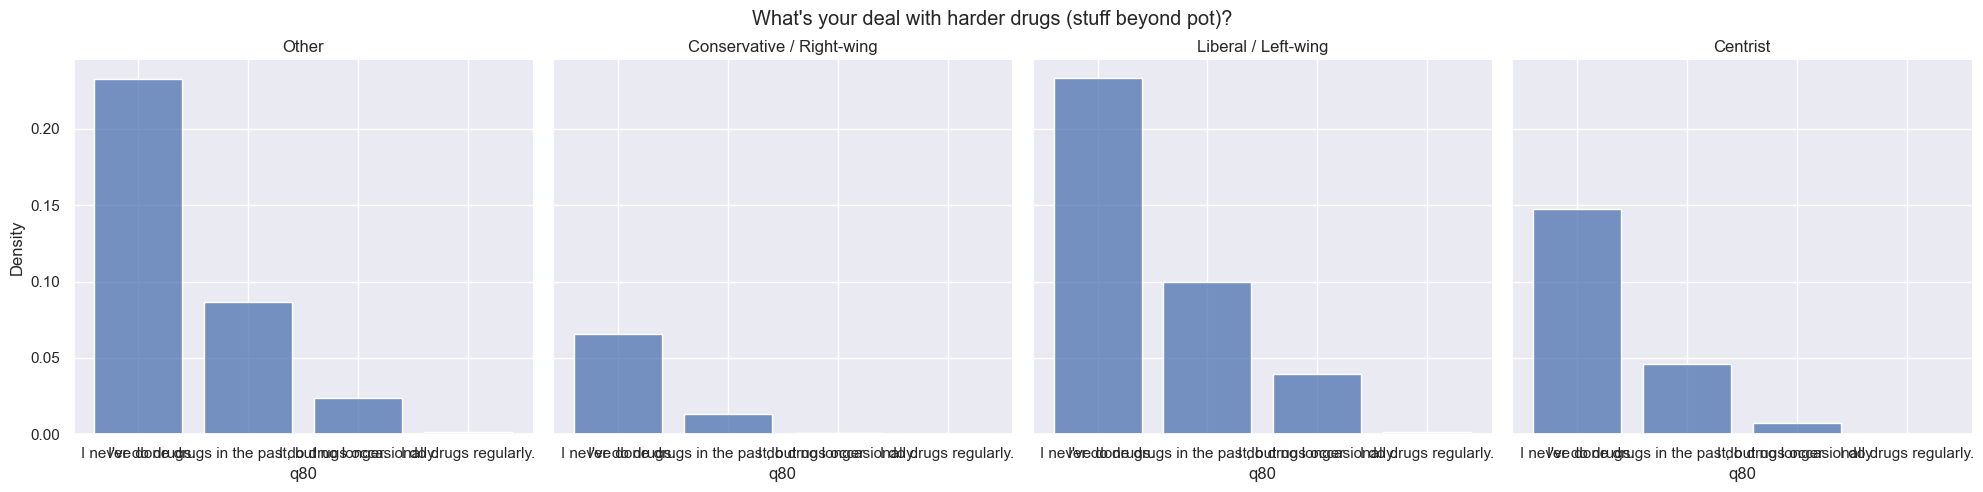

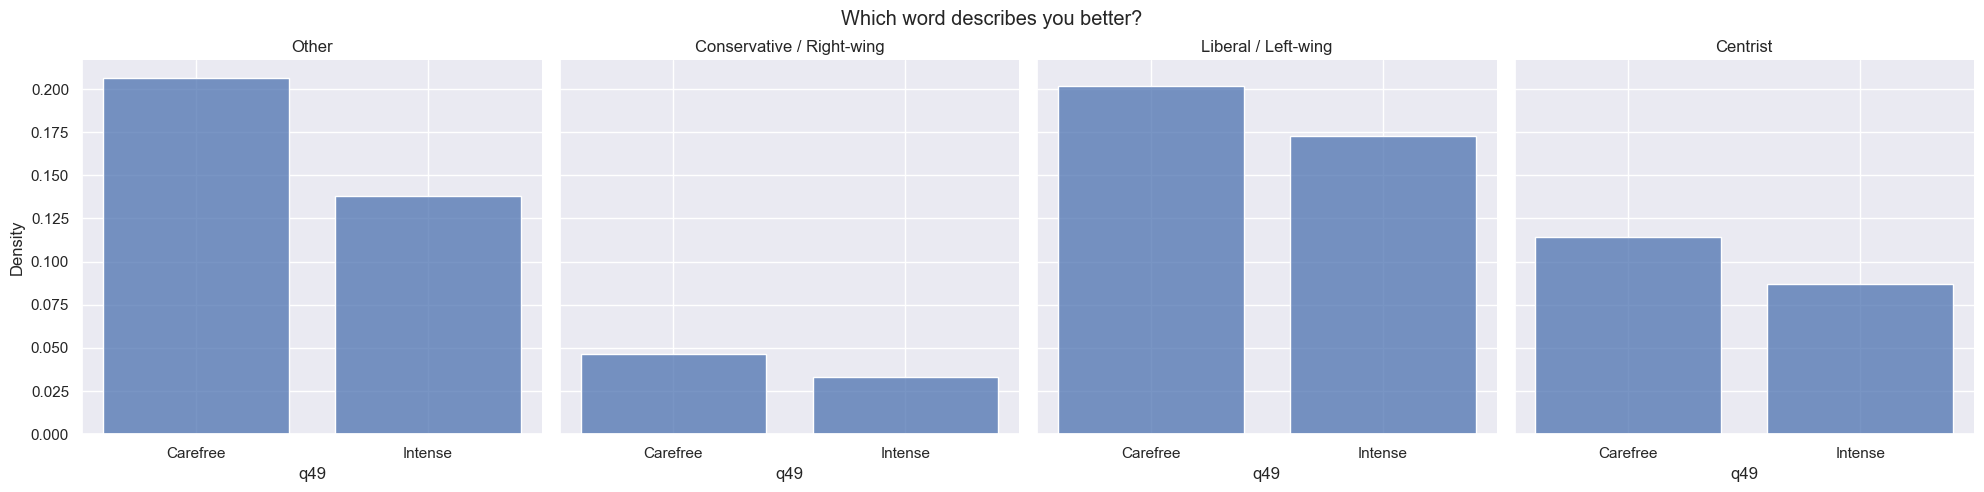

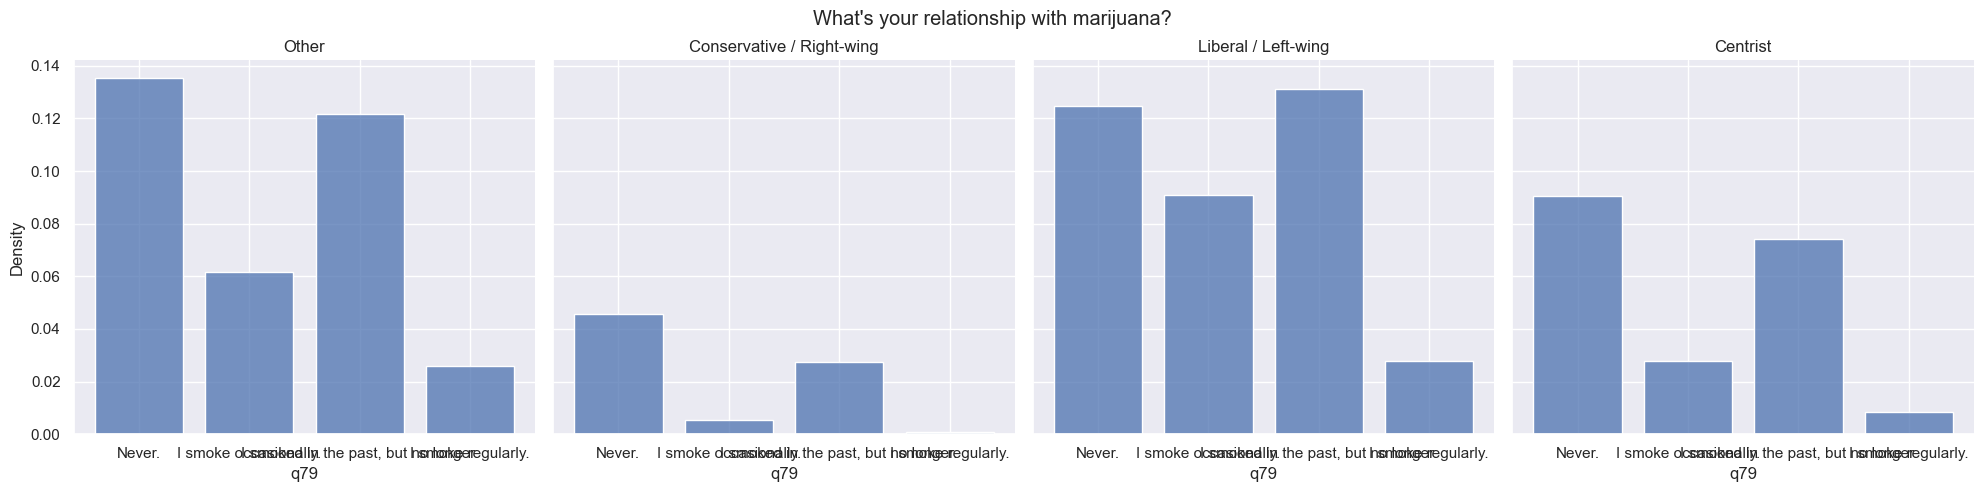

In [54]:
for question in df_train_top_10.drop(political_belief, axis=1).columns:
    # Create a Displot
    question_title = question_data.loc[question]['text']
    ax = sns.displot(df_train_top_10, x = question, kind='hist', shrink=0.8, col=political_belief, height=5, stat="density")
    # Set the bin names
    #ax.set_xticklabels(['Other', 'Right', 'Left', 'Centrist'])
    #ax.set_xlabels('Political belief')
    ax.fig.suptitle(question_title)
    ax.fig.tight_layout()
    ax.fig.subplots_adjust(top=0.88)
    ax.set_titles("{col_name}")
    ax.fig.set_size_inches(5*len(ax.col_names),5 )
    # Show the plot
    plt.show()

# Categorize Feature

In [21]:
options = [column for column in question_data.columns if 'option' in column]
questions_categories = {index: row[options].dropna().tolist()   for index, row in question_data.loc[questions_top_10].iterrows()}
unordered_categories = {k: questions_categories[k] for k in questions_categories.keys() - {'q20930', 'q77', 'q80', 'q79'}}
ordered_categories = {k: questions_categories[k] for k in questions_categories.keys() - unordered_categories.keys()}
print('Categories with no order:\n', unordered_categories)
print('Categories with order:\n', ordered_categories)

Categories with no order:
 {'q358084': ['Yes', 'No'], 'q4018': ['Yes', 'No'], 'q416235': ['Yes', 'No', "Can't answer without a subtitle"], 'q501': ['Yes', 'No'], 'q85419': ['White (such as Chardonnay, Riesling).', 'Red (such as Merlot, Cabernet, Shiraz).', 'Rosé (such as White Zinfindel).', "I don't drink wine."], 'q49': ['Carefree', 'Intense']}
Categories with order:
 {'q20930': ['Very, very high', 'Higher than average', 'Average', 'Below average'], 'q77': ['Very often', 'Sometimes', 'Rarely', 'Never'], 'q80': ['I do drugs regularly.', 'I do drugs occasionally.', "I've done drugs in the past, but no longer.", 'I never do drugs.'], 'q79': ['I smoke regularly.', 'I smoke occasionally.', 'I smoked in the past, but no longer.', 'Never.']}


In [49]:
for question, categories in unordered_categories.items():
    cat_type = CategoricalDtype(categories=categories)
    df_train_top_10.loc[:,question] = df_train_top_10[question].astype(cat_type)
    df_test_top_10.loc[:,question] = df_test_top_10[question].astype(cat_type)

for question, categories in ordered_categories.items():
    cat_type = CategoricalDtype(categories=categories.reverse(), ordered=True)
    df_train_top_10.loc[:,question] = df_train_top_10[question].astype(cat_type)
    df_train_top_10.loc[:,question] = df_test_top_10[question].astype(cat_type)

/var/folders/x_/zg37n3fn4wn8n2nxhq90dxyw0000gn/T/ipykernel_27651/1535900156.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_top_10.loc[:,question] = df_train_top_10[question].astype(cat_type)
/var/folders/x_/zg37n3fn4wn8n2nxhq90dxyw0000gn/T/ipykernel_27651/1535900156.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_train_top_10.loc[:,question] = df_train_top_10[question].astype(cat_type)
/var/folders/x_/zg37n3fn4wn8n2nxhq90dxyw0000gn/T/ipykernel_27651/1535900156.py:4: SettingWithCopyWarning: 
A value is trying